# k-Nearest Neighbors (kNN) Algorithm

## Objectives:
* To apply kNN algorithm to a fisheriris dataset.
* To identify similarity distance of the two (2) data points in a given dataset by applying distance function.
* To perform data analysis on fisheriris dataset.

## Directions:
1. Open fisheriris dataset (see attached fisheriris.xlsx) or you may download the csv it [here](https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv).
2. Determine the k-Nearest Neighbors by the finding the similarity distance (using Euclidian distance) of the two (2) data points (i.e. from the given new instance to each of the elements/data points in the whole dataset).

*Note:* Check attached file for the value of k and new instance assigned to you.


| k  | petal_length | petal_width |
|----|--------------|-------------|
| 16 | 5.0          | 1.4         |

In [823]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [545]:
iris = pd.read_csv('./datasets/iris.csv')

In [546]:
X = iris[['petal_length', 'petal_width']]
y = iris[['species']]

In [805]:
K = 16
new_instance = [5.0, 1.4]
# K = 12
# new_instance = [2.75, 0.75]

In [806]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [827]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=K, metric='euclidean')
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=16)

In [828]:
knn.predict([new_instance])[0]

'versicolor'

In [829]:
knn.score(X_test, y_test)

0.9777777777777777

In [830]:
y_pred = knn.predict(X_test)

In [831]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

In [812]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.9777777777777777

In [813]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       1.00      0.94      0.97        18
   virginica       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [814]:
distances = np.sqrt(np.sum((X - new_instance)**2, axis=1))
indices = pd.DataFrame(np.sort(np.argsort(distances, axis=1)[:K]))

## Scatter Plot (5.0, 1,4)

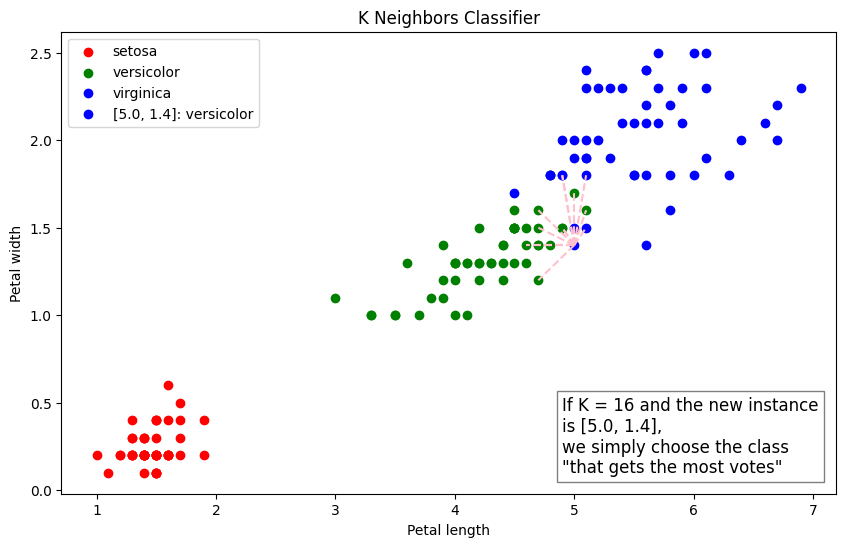

In [875]:
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

subspecies = iris.species.unique()
colours = ['red', 'green', 'blue']
class_colours ={subspecies[i]:colours[i] for i in range(3)}

pred_class = knn.predict([new_instance])[0]
pred_class_color = class_colours.get(pred_class)

plt.figure(figsize=(10, 6))

[plt.scatter(X[iris.species == subspecies[i]]['petal_length'], X[iris.species == subspecies[i]]['petal_width'], c=colours[i], label=subspecies[i]) for i in range(len(subspecies))]

plt.scatter(new_instance[0], new_instance[1], c=pred_color, label=f'{new_instance}: {pred_class}')
lines = LineCollection([(np.array(new_instance), np.array(X.iloc[indices[0][i]][['petal_length', 'petal_width']])) for i in range(K)], color='pink', linestyle='--')
plt.gca().add_collection(lines)

plt.title('K Neighbors Classifier')
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.text(4.9, 0.1, f'If K = {K} and the new instance\nis {new_instance},\nwe simply choose the class\n"that gets the most votes"', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))
plt.legend()
plt.show()